In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
class Dato(object):
    def __init__(self, n):
        self.x_rango = 3
        self.X, self.y = self.build_data(n)
           
    @staticmethod
    def analitica(x):
        y = 2.3 + np.sin(x) + np.power(np.max(x,0),1/3)
        return y
    
    def build_data(self,n):
        #n= 100
        #x_rango = 5
        sigma_eps = 0.6
        x = self.x_rango * (2 * np.random.rand(n) - 1)
        eps = sigma_eps * np.random.randn(n)
        y = self.analitica(x)+eps
        return x, y
    
    def build_train_test(self, p):
        perm_idx = np.random.permutation(self.X.shape[0])
        train_idx = perm_idx[0:int(p * self.X.shape[0])]
        test_idx = perm_idx[int(p * self.X.shape[0]):self.X.shape[0]]
        x_train = self.X[train_idx]
        y_train = self.y[train_idx]
        x_test = self.X[test_idx]
        y_test = self.y[test_idx]
        return x_train, y_train, x_test, y_test
    
    def plot_analitica(self):
        plt.figure(figsize=(10,5))
        x = np.linspace(-self.x_rango,self.x_rango,1000)
        plt.scatter(self.X, self.y)
        plt.plot(x, self.analitica(x), 'r')
        plt.show()   

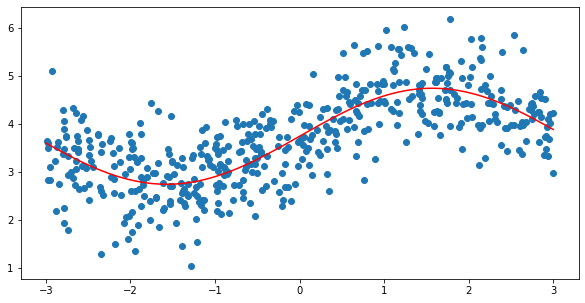

In [102]:
data = Dato(500)
data.plot_analitica()
X_train, y_train, X_test, y_test = data.build_train_test(0.8)

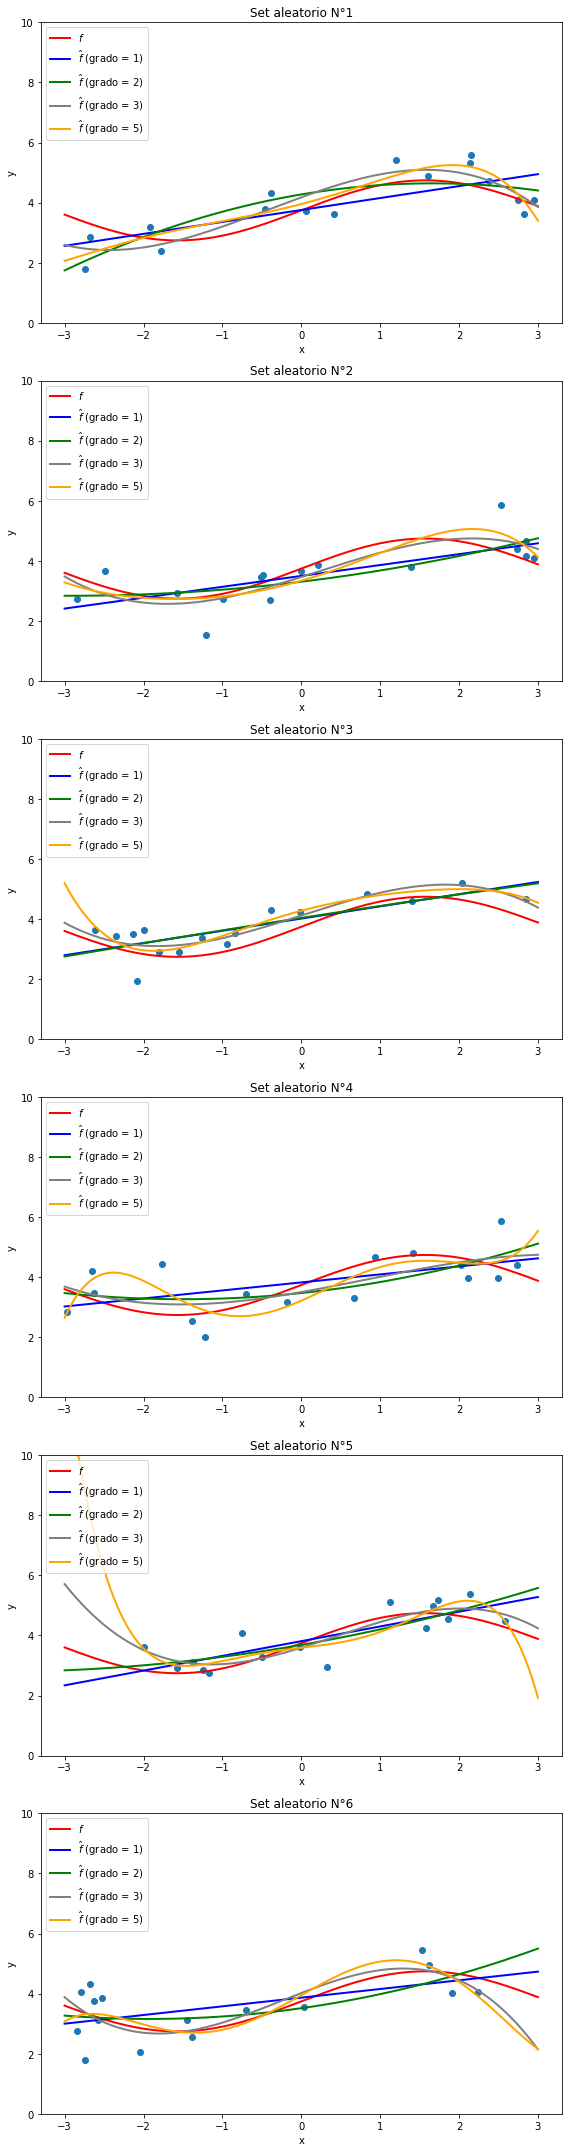

In [103]:
def f_hat(x, w):
    deg = len(w) - 1 #grado del polinomio, se resta 1 por la ord al origen
    exponentes = np.expand_dims(np.arange(deg, -1, -1), axis = 1)  #vector de exponentes
    return np.sum(w * np.power(x, exponentes).T, axis = 1) # se traspone para broadcastear contra w

def f(x):
    return 2.3 + np.sin(x) + np.power(np.max(x,0),1/3)


N = X_train.shape[0]
n_obs = int(0.04 * N)
color = ['blue','green','grey','orange']

grado = [1, 2, 3, 5]
x_rango = np.linspace(-3,3,1000)


fig, ax = plt.subplots(6, 1, figsize=(8, 30))
aux = 0
for i in range(6):
    w = []
    idx = np.random.permutation(N)[:n_obs]
    for j in grado:
        w.append(np.polyfit(X_train[idx], y_train[idx], j))
    
    ax[i].scatter(X_train[idx], y_train[idx])
    ax[i].plot(x_rango, f(x_rango), c = 'r', linewidth = 2.0)  #Función analítica
    for k in range(len(w)):
        ax[i].plot(x_rango, f_hat(x_rango, w[k]), c = color[k], linewidth = 2.0)
    
    aux = aux + 1
    ax[i].set_xlabel('x', size = 10)
    ax[i].set_ylabel('y', size = 10)
    ax[i].set_ylim(0, 10)
    ax[i].legend(['$f$', '$\hat{f}$ (grado = 1)', '$\hat{f}$ (grado = 2)', '$\hat{f}$ (grado = 3)',
                  '$\hat{f}$ (grado = 5)'], fontsize=10, loc = 2)
    ax[i].set_title('Set aleatorio N°{}'.format(aux), size = 12)

plt.tight_layout()
plt.show()